# Zadanie 1

In [28]:
import cv2
import numpy as np

import utils
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import math
import lorem

Oryginalna wiadomość: Guten morgen Welt
Odkodowana wiadomość: Guten morgen Welt


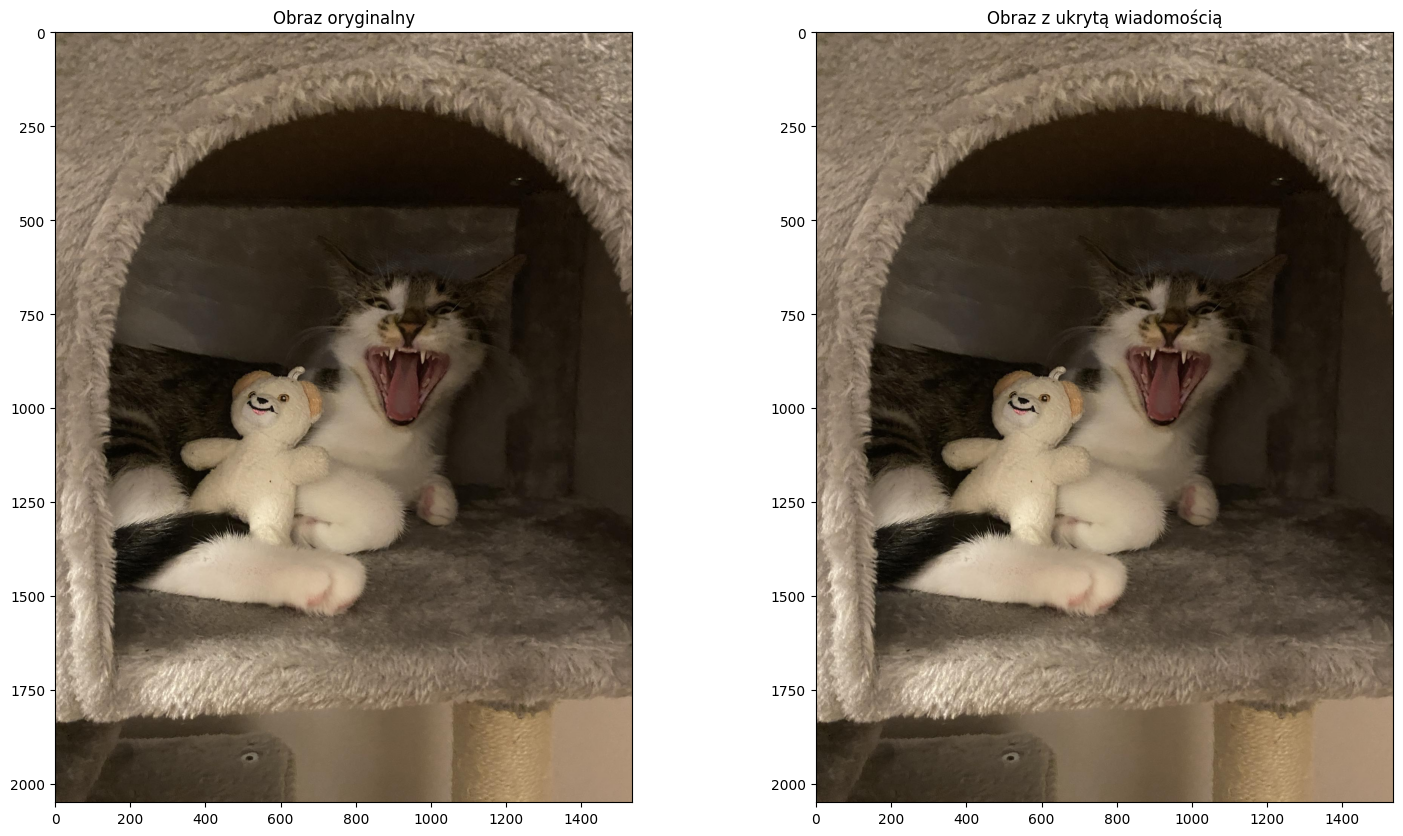

In [8]:

message_2 = utils.encode_as_binary_array('Guten morgen Welt')
image_1 = utils.load_image('./images/mecia.png')

image_1_hidden = utils.hide_message(image_1, message_2, nbits=1)
revealed = utils.reveal_message(image_1_hidden, nbits=1, length=len(message_2))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_1)
ax[0].set_title('Obraz oryginalny')
ax[1].imshow(image_1_hidden)
ax[1].set_title('Obraz z ukrytą wiadomością')
print(f'Oryginalna wiadomość: {utils.decode_from_binary_array(message_2)}')
print(f'Odkodowana wiadomość: {utils.decode_from_binary_array(revealed)}')
plt.show()

# Zadanie 2

In [9]:
image_2 = utils.load_image('./images/mecia.png')
required_length = (int(len(image_2.copy().flatten()) * .75 )) // 8
lorem_mesasge = lorem.text().replace('\n', ' ') + ' '
message_2 = lorem_mesasge * int(math.ceil(required_length / len(lorem_mesasge)))
message_2 = utils.encode_as_binary_array(message_2)

nbits = [
    [1, 2, 3, 4],
    [5, 6, 7, 8]
]

mses = []

fig = plt.figure()
gs = gridspec.GridSpec(3, 4)

for i in range(2):
    for j in range(4):
        img = utils.hide_message(image_2, message_2, nbits[i][j])
        mse = utils.mse(image_2, img)
        mses.append(mse)
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(img)
        ax.set_title(f'nbits = {nbits[i][j]}, MSE ~= {round(mse, 2)}')

big_boy = fig.add_subplot(gs[2, :])
big_boy.plot(list(range(1, 9)), mses)
big_boy.set_xlabel('nbits')
big_boy.set_ylabel('MSE')

plt.tight_layout()
plt.show()



KeyboardInterrupt: 

# Zadanie 3 - pokaz wizualny

In [ ]:
image_3 = utils.load_image('./images/mecia.png')
nbits_3 = 8
start_pos = 1400000

image_3_hidden = utils.hide_message(image_3, message_2, nbits_3, start_pos)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_3)
ax[0].set_title('Obraz oryginalny')
ax[1].imshow(image_3_hidden)
ax[1].set_title('Obraz z ukrytą wiadomością')

plt.show()

# Zadanie 3 - pokaz logiczny (XD?)

In [ ]:
nbits_3 = 1
start_pos = 1400000
message_3 = utils.encode_as_binary_array('No co tam halo dzwoni kurier z paka')

image_3_hidden = utils.hide_message(image_3, message_3, nbits_3, start_pos)
revealed = utils.reveal_message(image_3_hidden, nbits_3, len(message_3), start_pos)

print(f'Oryginalna wiadomość: {utils.decode_from_binary_array(message_3)}')
print(f'Odkodowana wiadomość: {utils.decode_from_binary_array(revealed)}')


# Zadanie 4

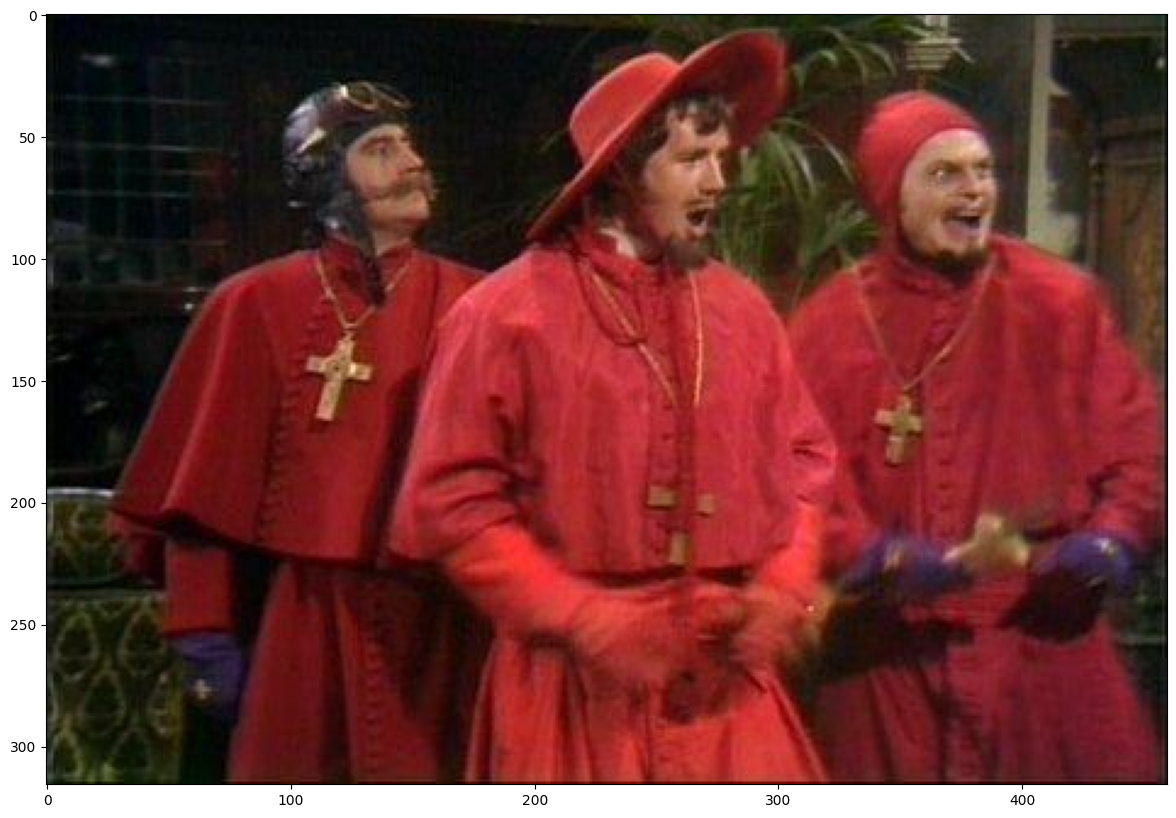

In [35]:
def reveal_image(image, length, nbits):
    decoded_bytes_str = utils.reveal_message(image, nbits, length)
    bytes_image = [
        int.to_bytes(
            int(decoded_bytes_str[i: i + 8], 2),
            1,
            byteorder='little'
        )
        for i in range(0, len(decoded_bytes_str), 8)
    ]
    file = b''.join(bytes_image)
    array = np.frombuffer(file, np.uint8)
    return cv2.cvtColor(cv2.imdecode(array, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    

image = utils.load_image("images/rembrandt.png")
image_with_secret, length_of_secret = utils.hide_image(image, "images/spanish.jpg", 1)
img = reveal_image(image_with_secret, length_of_secret, 1)
plt.imshow(img)

# Zadanie 5

In [ ]:
# def reveal_image(image, nbits):
#     found_header = False
#     image = np.copy(image).flatten()
#     i = 0
#     byte_str_tmp = ''
#     while not found_header or i < len(image):
#         
                
